In [2]:
import sys
sys.path.append("..")
import json
import PIL
import os

from lib.rag.knowledge_base import build_database, create_embedding_model, KnowledgeBase
from lib.models.llama import LlamaReaderQuantized
from lib.rag.rag_system import RAGSystem


In [3]:
with open("dataset_beluga.json", "r") as f:
    data = json.load(f)
    

In [4]:
db = KnowledgeBase.build(data, use_captions=True, use_graphs=True)

/home/timur_akht/projects/genai_navirag/notebooks/../lib/rag/knowledge_base.py:43: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(
/home/timur_akht/.miniconda3/envs/navirag_1_py310/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
llama_model = LlamaReaderQuantized()

Loading checkpoint shards: 100%|██████████| 15/15 [00:35<00:00,  2.37s/it]


In [6]:
rag = RAGSystem(knowledge_base=db,
                reader_lm=llama_model)

In [8]:
result = rag.get_answer("I'm looking for a lounge room with a red sofa that is in front of a large window. Give me the ID of this image and explain why you chose it.",
                        rerank=True)

100%|██████████| 1/1 [00:00<00:00, 44.62it/s]
/home/timur_akht/.miniconda3/envs/navirag_1_py310/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/timur_akht/.miniconda3/envs/navirag_1_py310/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:397: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


In [10]:
result.lm_answer

'  Based on the provided context, the image that matches the description of a lounge room with a red sofa in front of a large window is Document 1::: Image ID: 01040.\n\nThe scene graph for this image includes a red sofa (Cushion_1) located in front of a large window (Window_1), which is indicated by the arrow pointing from the sofa to the window. Additionally, the sofa is positioned below a curved wooden counter or bar (Chair_1), which further matches the description of a lounge room.\n\nTherefore, the ID of the image that matches the description is 01040.'

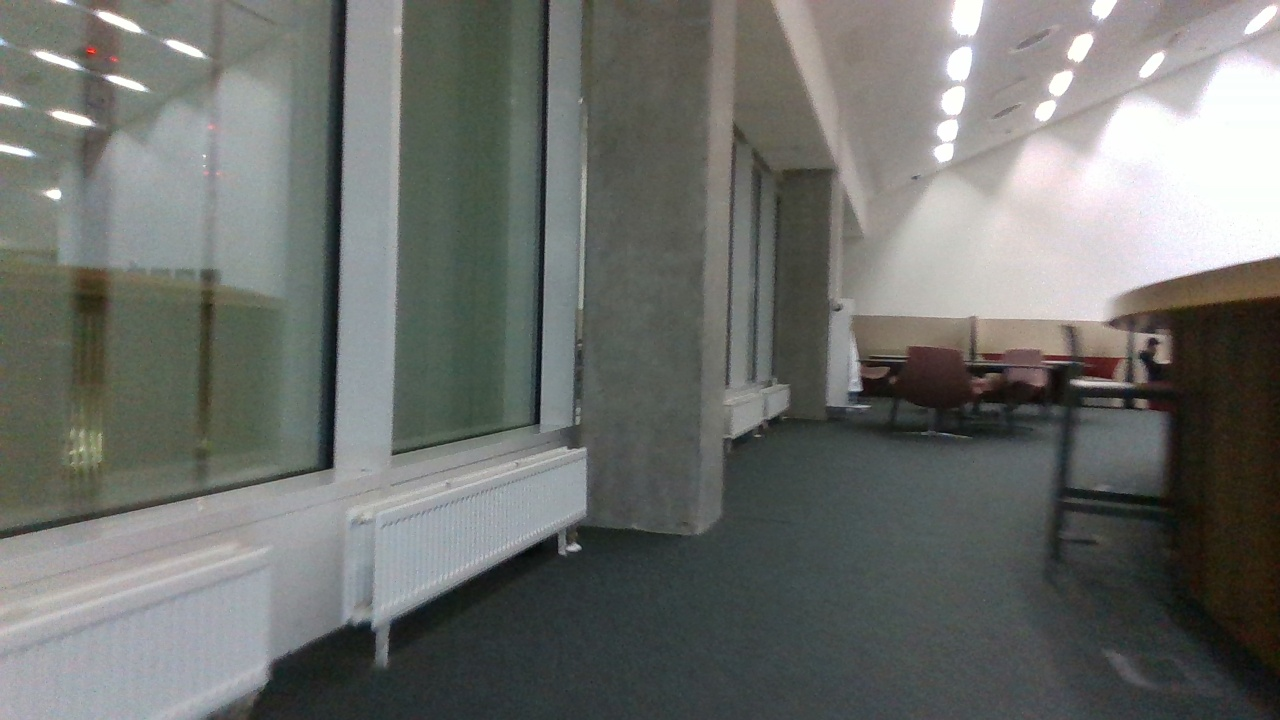

In [11]:
PIL.Image.open("/mnt/vol0/datasets/rosbag2_navigation_for_graph_21_feb_2024/rgb_images/01040.jpg")